In [1]:
import string
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

In [3]:
data = pd.read_csv('../../data/chatgpt_generated_wiki_data_1_5000.csv')

In [4]:
# Word count
data['Text'].replace('', np.nan, inplace=True)
data.dropna(subset=['Text'], inplace=True)
data["word_count_wiki"] = data["Text"].apply(lambda x: len(x))
data = data[(data["word_count_wiki"] >= 100)]

data['GPT_Generated_Text'].replace('', np.nan, inplace=True)
data.dropna(subset=['GPT_Generated_Text'], inplace=True)
data["word_count_gpt"] = data["GPT_Generated_Text"].apply(lambda x: len(x))
data = data[(data["word_count_gpt"] >= 100)]
data_100 = data.iloc[0:100,:]

In [5]:
data_100['char_count_wiki'] = data_100['Text'].apply(len)
data_100['word_density_wiki'] = data_100['char_count_wiki'] / (data_100['word_count_wiki']+1)
data_100['punctuation_count_wiki'] = data_100['Text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
data_100['title_word_count_wiki'] = data_100['Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
data_100['upper_case_word_count_wiki'] = data_100['Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

data_100['noun_count_wiki'] = data_100['Text'].apply(lambda x: check_pos_tag(x, 'noun'))
data_100['verb_count_wiki'] = data_100['Text'].apply(lambda x: check_pos_tag(x, 'verb'))
data_100['adj_count_wiki'] = data_100['Text'].apply(lambda x: check_pos_tag(x, 'adj'))
data_100['adv_count_wiki'] = data_100['Text'].apply(lambda x: check_pos_tag(x, 'adv'))
data_100['pron_count_wiki'] = data_100['Text'].apply(lambda x: check_pos_tag(x, 'pron'))

data_100['char_count_gpt'] = data_100['GPT_Generated_Text'].apply(len)
data_100['word_density_gpt'] = data_100['char_count_gpt'] / (data_100['word_count_gpt']+1)
data_100['punctuation_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
data_100['title_word_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
data_100['upper_case_word_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

data_100['noun_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: check_pos_tag(x, 'noun'))
data_100['verb_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: check_pos_tag(x, 'verb'))
data_100['adj_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: check_pos_tag(x, 'adj'))
data_100['adv_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: check_pos_tag(x, 'adv'))
data_100['pron_count_gpt'] = data_100['GPT_Generated_Text'].apply(lambda x: check_pos_tag(x, 'pron'))

C:\Users\amart\AppData\Local\Temp\ipykernel_7948\2487709530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100['char_count_wiki'] = data_100['Text'].apply(len)
C:\Users\amart\AppData\Local\Temp\ipykernel_7948\2487709530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100['word_density_wiki'] = data_100['char_count_wiki'] / (data_100['word_count_wiki']+1)
C:\Users\amart\AppData\Local\Temp\ipykernel_7948\2487709530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

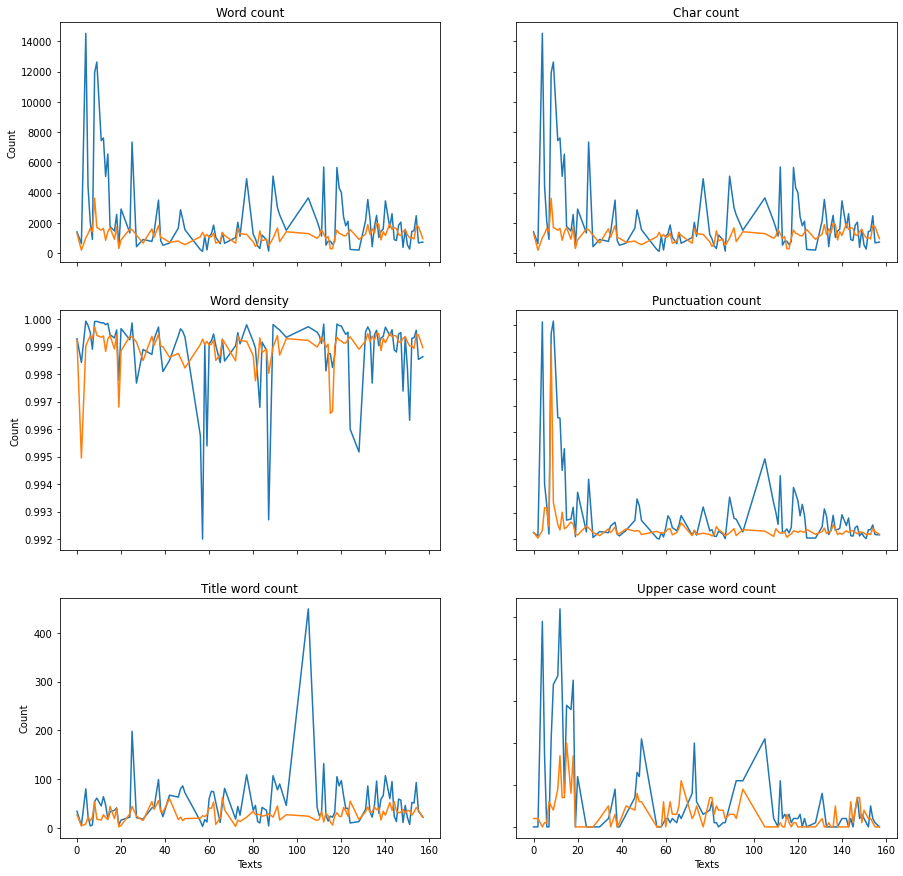

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].plot(data_100['word_count_wiki'])
axs[0, 0].plot(data_100['word_count_gpt'])
axs[0, 0].set_title('Word count')


axs[0, 1].plot(data_100['char_count_wiki'])
axs[0, 1].plot(data_100['char_count_gpt'])
axs[0, 1].set_title('Char count')

axs[1, 0].plot(data_100['word_density_wiki'])
axs[1, 0].plot(data_100['word_density_gpt'])
axs[1, 0].set_title('Word density')

axs[1, 1].plot(data_100['punctuation_count_wiki'])
axs[1, 1].plot(data_100['punctuation_count_gpt'])
axs[1, 1].set_title('Punctuation count')

axs[2, 0].plot(data_100['title_word_count_wiki'])
axs[2, 0].plot(data_100['title_word_count_gpt'])
axs[2, 0].set_title('Title word count')

axs[2, 1].plot(data_100['upper_case_word_count_wiki'])
axs[2, 1].plot(data_100['upper_case_word_count_gpt'])
axs[2, 1].set_title('Upper case word count')

for ax in axs.flat:
    ax.set(xlabel='Texts', ylabel='Count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()